# Perform Segmentation Operation On Gray Image

1. Image Segmentation Techniques
2. Implement Point Detection
3. Implement Line Detection
4. Apply Global Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

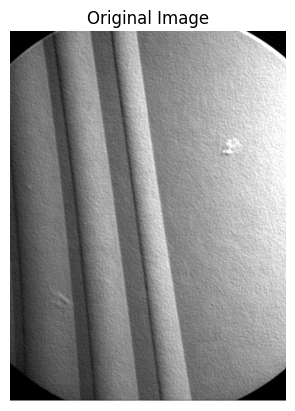

In [2]:
img1 = cv2.imread("DIP3E_Original_Images_CH10/Fig1004(b)(turbine_blade_black_dot).tif",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img1,cmap = 'gray')
plt.show()

In [13]:
import numpy as np

def calculate_target_size(img, ker, padding=0, stride=1):
    H, W = img.shape
    kh, kw = ker.shape
    out_h = ((H - kh + 2 * padding) // stride) + 1
    out_w = ((W - kw + 2 * padding) // stride) + 1
    return out_h, out_w

def convolve_from_scratch(image, kernel, padding=0, stride=1):
    kh, kw = kernel.shape
    padded_img = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    out_h, out_w = calculate_target_size(image, kernel, padding, stride)

    convolved_img = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = padded_img[i*stride:i*stride+kh, j*stride:j*stride+kw]
            convolved_img[i, j] = np.sum(region * kernel)
    
    return convolved_img


1. Point Detection

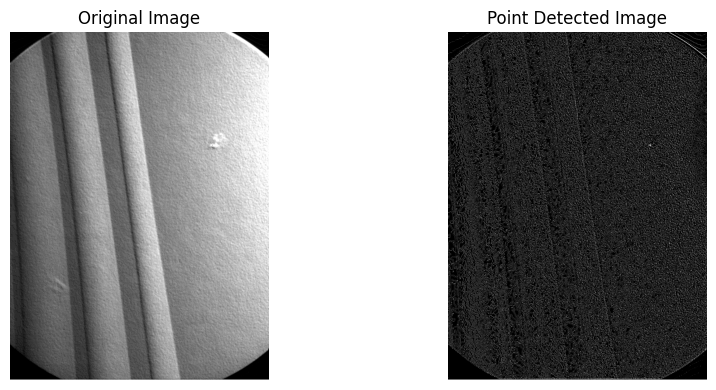

In [14]:
# Laplacian filter is used to detect points
laplacian =  np.array([[-1,-1,-1],
                              [-1,8,-1],
                             [-1,-1,-1]])
point_detected_img = cv2.filter2D(img1,-1,laplacian) 
# Or use
# box_filtered_image = cv2.filter2D(img,-1,box_filter) -> Inbuilt function
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img1,cmap = "gray")

plt.subplot(1,2,2)
plt.title('Point Detected Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(point_detected_img,cmap = "gray")

plt.show()

2. Line Detection

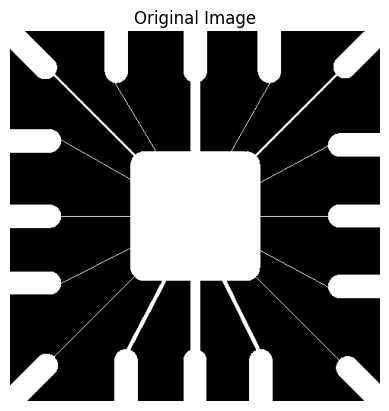

In [2]:
img2 = cv2.imread("DIP3E_Original_Images_CH10/Fig1005(a)(wirebond_mask).tif",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')
plt.show()

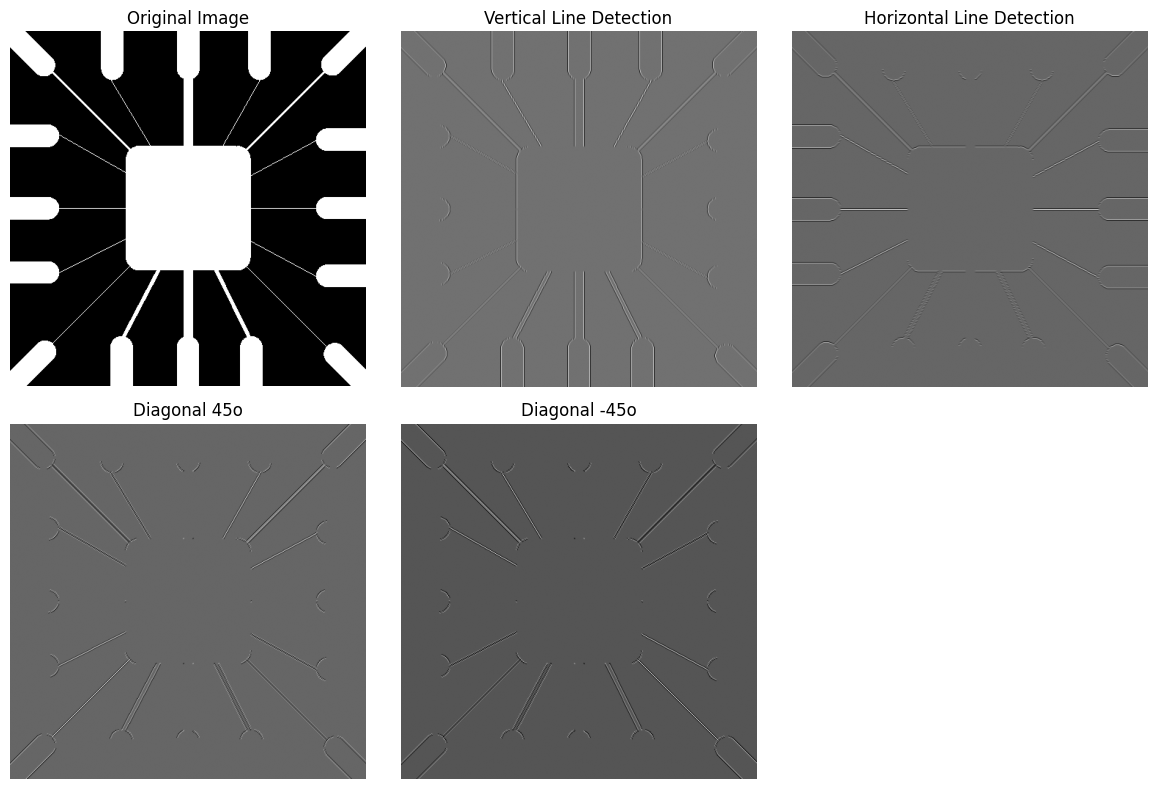

In [16]:
vertical_kernel = np.array([[-1,2,-1],
                           [-1,2,-1],
                           [-1,2,-1]],dtype = np.float32)

horizontal_kernel = np.array([[-1,-1,-1],
                             [2,2,2],
                             [-1,-1,-1]], dtype = np.float32)
diag_45 = np.array([[-1,-1,2],
                    [-1,2,-1],
                    [2,-1,-1]], dtype = np.float32)

diag_minus_45 = np.array([[2,-1,-1],
                        [-1,2,-1],
                        [-1,-1,2]], dtype = np.float32)

# Use cv2.filter2D(img,-1, kernel) for convolution if you don't want to do it from scratch
o1 = convolve_from_scratch(img2,vertical_kernel)
o2 = convolve_from_scratch(img2,horizontal_kernel)
o3 = convolve_from_scratch(img2,diag_45) 
o4 = convolve_from_scratch(img2,diag_minus_45)

plt.figure(figsize=(12,8))


plt.subplot(2,3,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img2,cmap = "gray")

plt.subplot(2,3,2)
plt.title("Vertical Line Detection")
plt.axis("off")
plt.tight_layout()
plt.imshow(o1,cmap = "gray")

plt.subplot(2,3,3)
plt.title('Horizontal Line Detection')
plt.axis("off")
plt.tight_layout()
plt.imshow(o2,cmap = "gray")

plt.subplot(2,3,4)
plt.title('Diagonal 45o')
plt.axis("off")
plt.tight_layout()
plt.imshow(o3,cmap = "gray")

plt.subplot(2,3,5)
plt.title('Diagonal -45o')
plt.axis("off")
plt.tight_layout()
plt.imshow(o4,cmap = "gray")

plt.tight_layout()
plt.show()

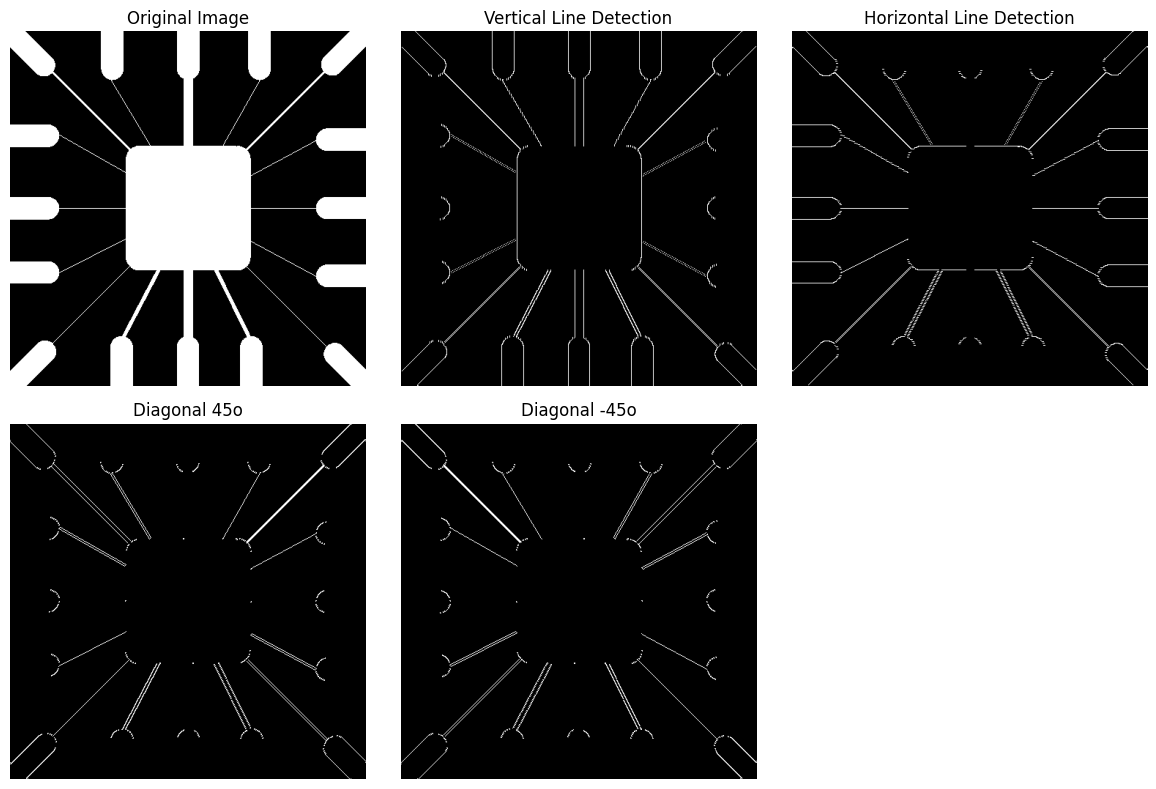

In [6]:
# Using Inbuilt Function

vertical_kernel = np.array([[-1,2,-1],
                           [-1,2,-1],
                           [-1,2,-1]],dtype = np.float32)

horizontal_kernel = np.array([[-1,-1,-1],
                             [2,2,2],
                             [-1,-1,-1]], dtype = np.float32)
diag_45 = np.array([[-1,-1,2],
                    [-1,2,-1],
                    [2,-1,-1]], dtype = np.float32)

diag_minus_45 = np.array([[2,-1,-1],
                        [-1,2,-1],
                        [-1,-1,2]], dtype = np.float32)

# Use cv2.filter2D(img,-1, kernel) for convolution if you don't want to do it from scratch
o1 = cv2.filter2D(img2,-1,vertical_kernel)
o2 = cv2.filter2D(img2,-1,horizontal_kernel)
o3 = cv2.filter2D(img2,-1,diag_45)
o4 = cv2.filter2D(img2,-1,diag_minus_45)


plt.figure(figsize=(12,8))


plt.subplot(2,3,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img2,cmap = "gray")

plt.subplot(2,3,2)
plt.title("Vertical Line Detection")
plt.axis("off")
plt.tight_layout()
plt.imshow(o1,cmap = "gray")

plt.subplot(2,3,3)
plt.title('Horizontal Line Detection')
plt.axis("off")
plt.tight_layout()
plt.imshow(o2,cmap = "gray")

plt.subplot(2,3,4)
plt.title('Diagonal 45o')
plt.axis("off")
plt.tight_layout()
plt.imshow(o3,cmap = "gray")

plt.subplot(2,3,5)
plt.title('Diagonal -45o')
plt.axis("off")
plt.tight_layout()
plt.imshow(o4,cmap = "gray")

plt.tight_layout()
plt.show()

3. Global Thresholding

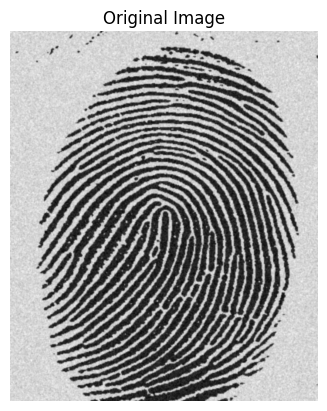

In [7]:
img3 = cv2.imread("DIP3E_Original_Images_CH10/Fig1038(a)(noisy_fingerprint).tif",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img3,cmap = 'gray')
plt.show()

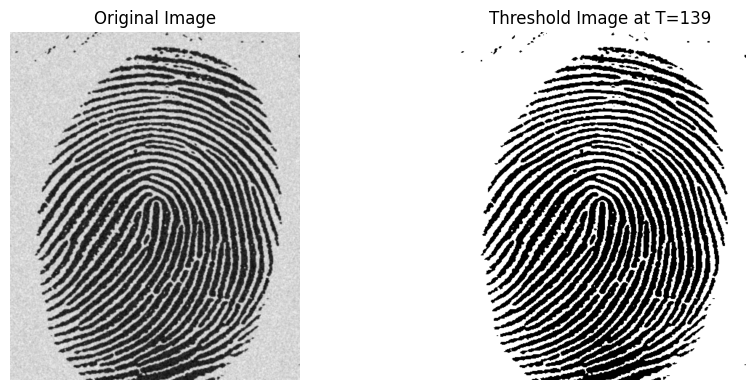

In [12]:
# Using Inbuilt Function 
# threshold_value = np.uint8(np.mean(img3))
# _,threshold_image = cv2.threshold(img3,threshold_value,255,cv2.THRESH_BINARY)

# from scratch ->
def global_thresholding(image,threshold):
    bin_image = np.zeros_like(image)
    bin_image[image > threshold] = 255
    return bin_image
    
threshold_img = global_thresholding(img3,np.uint8(np.mean(img3)))

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img3,cmap = "gray")

plt.subplot(1,2,2)
plt.title(f'Threshold Image at T={threshold_value}')
plt.axis("off")
plt.tight_layout()
plt.imshow(threshold_img,cmap = "gray")

plt.show()